# Laboratorio 6
**Ciencias naturales y tecnología**

Solución de un problema aplicado usando el algoritmo de Grover

**Estudiante:** Ana Gabriela Silva. 

## Contexto:

Catalina, una estudiante de Ingeniería de Sistemas se encuentra planeando su horario de clases. Las materias que puede ver son las siguientes:

- CALV
- AYED
- MATD
- CNYT
- CIPP

Sin embargo, Catalina necesita que su horario cumpla las siguientes condiciones de forma simultánea:

1. Si inscribe MATD, entonces también inscribirá CALV
2. Si inscribe AYED, entonces también inscribirá CNYT
3. Verá MATD o CIPP pero sólo una de las dos
4. No inscribirá CALV o no inscribirá AYED
5. No inscribirá CNYT o no inscribirá CIPP


## Ejercicio: 
Necesitas construir un oráculo que implemente las condiciones dadas y **dibujarlo**. Requerirás alambres para las incógnitas, alambres para las condiciones 1 a 5 y un alambre para la condición total. Finalmente debes usar el algoritmo de Grover (**dibuja el circuito de Grover**) para determinar el o los posibles horarios que puede hacer Catalina ejecutando tu circuito con ```shots=1000``` en el simulador. Debes mostrar tu histograma e interpretar las soluciones redactando en español cómo estaría o cómo estarían conformados los horarios que puede armar Catalina.

---

### Ayudas: 

Catalina te recuerda que: 

* La condición $p \rightarrow q$ es lógicamente equivalente a $\lnot p \lor q$.
* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:




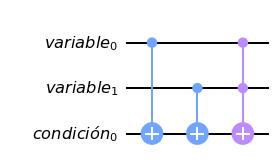

* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \lnot \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:

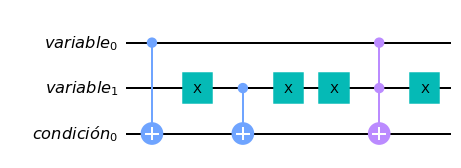

* Puedes generalizar estas ayudas para implementar tu oráculo, también puedes usar otras equivalencias lógicas que consideres convenientes.

* Sólo necesitarás implementar una iteración del algoritmo de Grover.

# Solución:

**Proposiciones LAB 06**

**a**:inscribe MATD
**b**:inscribe CALV
**p**:inscribe AYED
**q**:inscribe CNYT
**x**:inscribe CIPP

**Lenguaje lógico**
* $a \rightarrow b$ = $\lnot a \lor b$.
* $p \rightarrow q$ = $\lnot p \lor q$.
* $a \lor x$
* $\lnot b \lor \lnot p$
* $\lnot q \lor \lnot x$


In [2]:
#Importación
from qiskit import QuantumCircuit #Clase para crear circuitos
from qiskit import execute #Función para ejecutar simulaciones o trabajos en computadores cuánticos reales.
from qiskit import Aer #Módulo donde encontramos el acceso al simulador
from qiskit.visualization import plot_histogram #Visualizador del output como gráfico de barras
%matplotlib inline 
import numpy as np

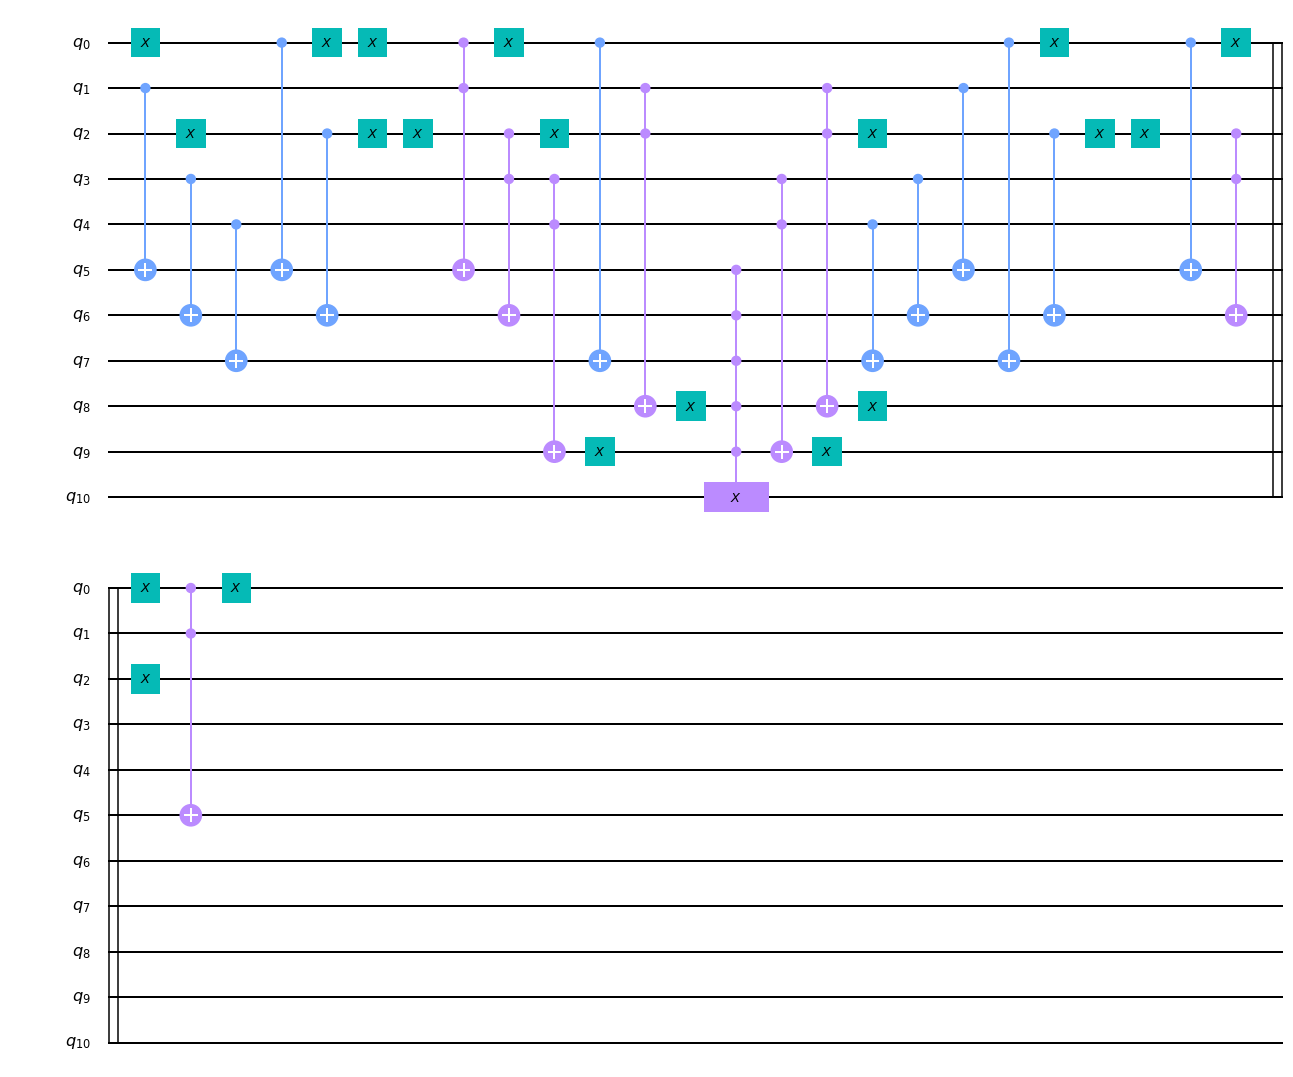

In [9]:
circuitoCondicion = QuantumCircuit(11)

#Condición 1
circuitoCondicion.cx(1,5)
circuitoCondicion.x(0)
circuitoCondicion.cx(0,5)
circuitoCondicion.x(0)
circuitoCondicion.x(0)
circuitoCondicion.ccx(0,1,5)
circuitoCondicion.x(0)

#circuitoCondicion.barrier()

#Condición 2
circuitoCondicion.cx(3,6)
circuitoCondicion.x(2)
circuitoCondicion.cx(2,6)
circuitoCondicion.x(2)
circuitoCondicion.x(2)
circuitoCondicion.ccx(2,3,6)
circuitoCondicion.x(2)

#circuitoCondicion.barrier()

#Condición 3
circuitoCondicion.cx(4,7)
circuitoCondicion.cx(0,7)

#circuitoCondicion.barrier()

#Condición 4
circuitoCondicion.ccx(1,2,8)
circuitoCondicion.x(8)

#circuitoCondicion.barrier()

#Condición 5
circuitoCondicion.ccx(3,4,9)
circuitoCondicion.x(9)

#circuitoCondicion.barrier()

#Todas Las condiciones
circuitoCondicion.mct([5,6,7,8,9],10)

#circuitoCondicion.barrier()

#Condición 5
circuitoCondicion.ccx(3,4,9)
circuitoCondicion.x(9)

#circuitoCondicion.barrier()

#Condición 4
circuitoCondicion.ccx(1,2,8)
circuitoCondicion.x(8)

#circuitoCondicion.barrier()

#Condición 3
circuitoCondicion.cx(4,7)
circuitoCondicion.cx(0,7)

#circuitoCondicion.barrier()

#Condición 2
circuitoCondicion.cx(3,6)
circuitoCondicion.x(2)
circuitoCondicion.cx(2,6)
circuitoCondicion.x(2)
circuitoCondicion.x(2)
circuitoCondicion.ccx(2,3,6)
circuitoCondicion.x(2)

#circuitoCondicion.barrier()

#Condición 1
circuitoCondicion.cx(1,5)
circuitoCondicion.x(0)
circuitoCondicion.cx(0,5)
circuitoCondicion.x(0)
circuitoCondicion.x(0)
circuitoCondicion.ccx(0,1,5)
circuitoCondicion.x(0)



circuitoCondicion.draw(output='mpl')

In [14]:
oracCondicion= circuitoCondicion.to_gate()
oracCondicion.name = 'Óraculo Condiciones'

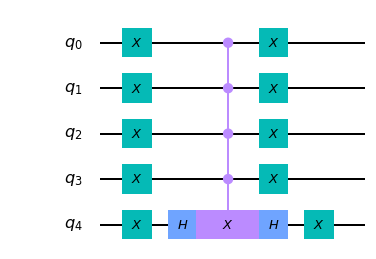

In [15]:
difusion = QuantumCircuit(5)
difusion.x([0,1,2,3,4])
difusion.h(4)
difusion.mct([0,1,2,3],4)
difusion.h(4)
difusion.x([0,1,2,3,4])
difusion.draw(output='mpl')

In [16]:
diff =difusion.to_gate()
diff.name = 'Difusión'

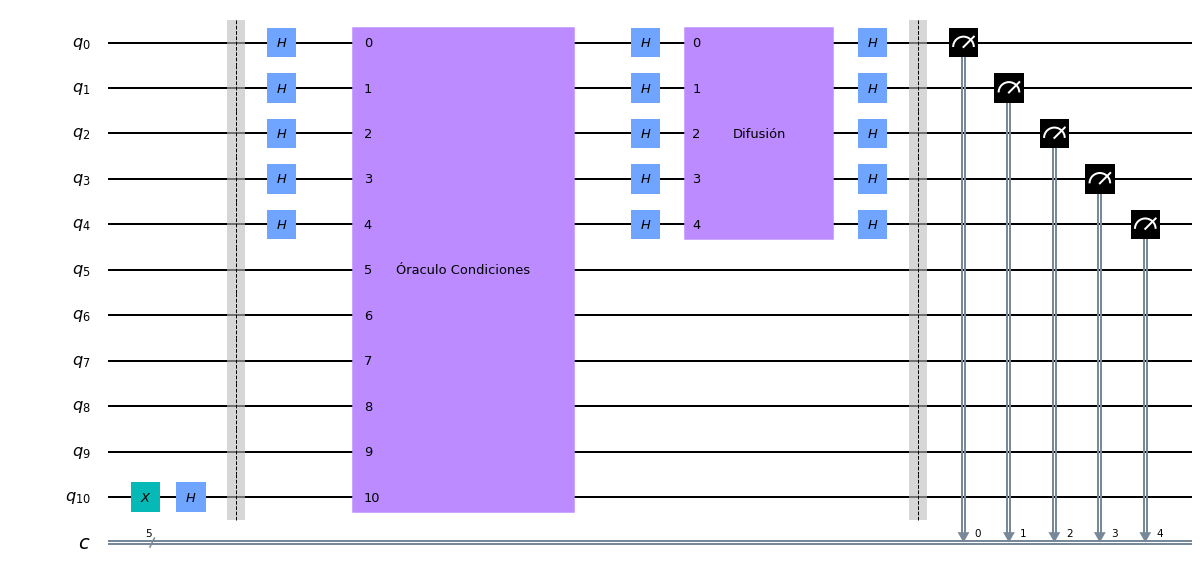

In [35]:
circuitoGrover = QuantumCircuit(11,5)
circuitoGrover.x(10)
circuitoGrover.h(10)
circuitoGrover.barrier()
circuitoGrover.h([0,1,2,3,4])

for i in range(1):
    circuitoGrover.append(oracCondicion,[0,1,2,3,4,5,6,7,8,9,10])
    circuitoGrover.h([0,1,2,3,4])
    circuitoGrover.append(diff ,[0,1,2,3,4])
    circuitoGrover.h([0,1,2,3,4])
    circuitoGrover.barrier()
circuitoGrover.measure([0,1,2,3,4],[0,1,2,3,4])


circuitoGrover.draw(output='mpl')





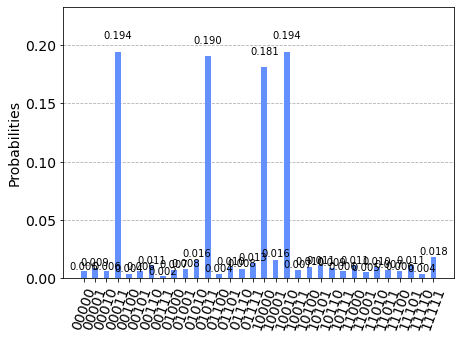

In [36]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuitoGrover, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

> **Conclusiones**

Las cadenas ganadoras, son las siguientes:

1. 11000
- 11010
- 00001
- 01001

--- 

* La primera cadena representa que Catalina podría cursar MATD Y CALV.
* La segunda cadena representa que Catalina podría cursar MATD, CLAV Y CNYT.
* La tercera cadena representa que Catalina podría cursar CIPP solamente.
* La cuarta cadena representa que Catalina podría cursar CALV Y CIPP.

